<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Classification - Final Assignment</font></h1>


## Import the required libraries


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


## Importing the Dataset


Read your chosen dataset into pandas dataframe:


In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 1. About the Data


In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

The dataset in this project contains various columns with different data types. The majority of the columns are of integer type, representing attributes such as age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar, etc. There is one column of float type, which represents the oldpeak attribute. The data types of the columns are important for understanding the nature of the data and for performing appropriate data analysis and modeling techniques.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The dataset in this project contains information related to heart disease. It consists of 303 entries, with each entry representing a patient. The dataset includes various attributes such as age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar etc. By exploring and analyzing this dataset, we can gain insights into the factors that contribute to heart disease and potentially develop predictive models to identify individuals at risk.

When inspecting the data we can understand that some features are labeled. In this part we need to understand those labelings and what they represent. Here is description of the data: 

Note: It's taken from dataset's homepage so it includes some scientific explanations.



Data Explanation:
1. age: age in years
2. sex:
   - 0 = female
   - 1 = male
3. cp: chest pain type
   - Value 0: typical angina
   - Value 1: atypical angina
   - Value 2: non-anginal pain
   - Value 3: asymptomatic
4. trestbps: resting blood pressure 
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)
   - 0 = false
   - 1 = true
7. restecg: resting electrocardiographic results
   - Value 0: normal
   - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
   - 0 = no
   - 1 = yes
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
   - Value 0: upsloping
   - Value 1: flat
   - Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal:
    - 0 = error 
    - 1 = fixed defect
    - 2 = normal
    - 3 = reversible defect
14. target (the label):
    - 0 = no disease
    - 1 = disease
    
(Taken from dataset's page)

In [20]:
print(data['thal'].value_counts())
print(data['ca'].value_counts())

thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64
ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64


From our data explanation part we can see that there shouldn't be a data who has 'thal' value equals to '0' and 'ca' value equals to '4'. To solve this issue we need to drop those datas(rows).

In [24]:
rows = data[(data['thal'] == 0) | (data['ca'] == 4)].index
rows = rows + 1 # To match the row numbers 
print(rows)

Index([49, 93, 159, 164, 165, 252, 282], dtype='int64')


These datas [49, 93, 159, 164, 165, 252, 282] have wrongly initialized values so we are dropping those datas.

In [ ]:
data = data.drop(rows)

In [27]:
print(len(data)) # new length of data

296


In [28]:
# renaming data columns to make them more readable
data = data.rename(columns={'age': 'Age', 'sex': 'Sex', 'cp': 'ChestPain', 'trestbps': 'RestingBP', 
                            'chol': 'Cholesterol', 'fbs': 'FastingSugar', 'restecg': 'RestingECG', 
                            'thalach': 'MaxHeartRate', 'exang': 'ExerciseAngina', 'oldpeak': 'STDepression',
                              'slope': 'STSegmentSlope', 'ca': 'MajorVessels', 'thal': 'Thalassemia', 'target': 'Target'})


In [29]:
data.head()

,Age,Sex,ChestPain,RestingBP,Cholesterol,FastingSugar,RestingECG,MaxHeartRate,ExerciseAngina,STDepression,STSegmentSlope,MajorVessels,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Grouping features according to their type for preparing data visualization.

In [30]:
# categorical binary features
binary_data = data[['Sex', 'FastingSugar', 'ExerciseAngina', 'Target']]

# categorical multi-class features
multiclass_data = data[['ChestPain', 'RestingECG', 'STSegmentSlope', 'Thalassemia', 'MajorVessels']]

categorical_data = binary_data + multiclass_data

# numerical features
numerical_data = data[['Age', 'RestingBP', 'Cholesterol', 'MaxHeartRate', 'STDepression']]

Text(0.5, 1.0, 'Target Distribution')

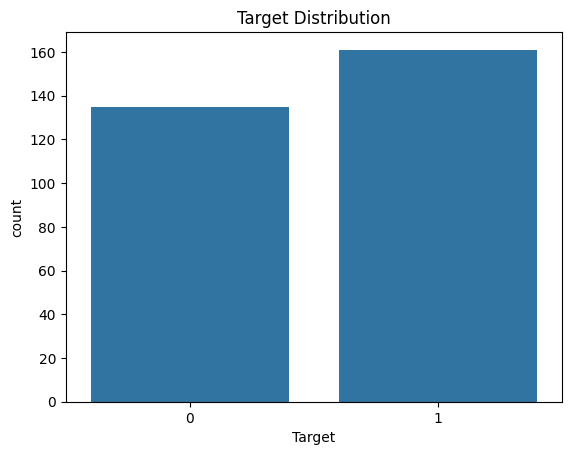

In [32]:
ax = sns.countplot(data=data, x='Target')
ax.set_title('Target Distribution')


Numerical Features Visualization:

In [33]:
data[numerical_data.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,296.0,54.337838,9.094274,29.0,47.00,55.0,61.00,77.0
RestingBP,296.0,131.486486,17.652382,94.0,120.00,130.0,140.00,200.0
Cholesterol,296.0,246.290541,52.044147,126.0,211.00,240.5,274.00,564.0
MaxHeartRate,296.0,149.797297,22.820882,71.0,135.25,152.5,166.25,202.0
STDepression,296.0,1.045270,1.165163,0.0,0.00,0.8,1.60,6.2


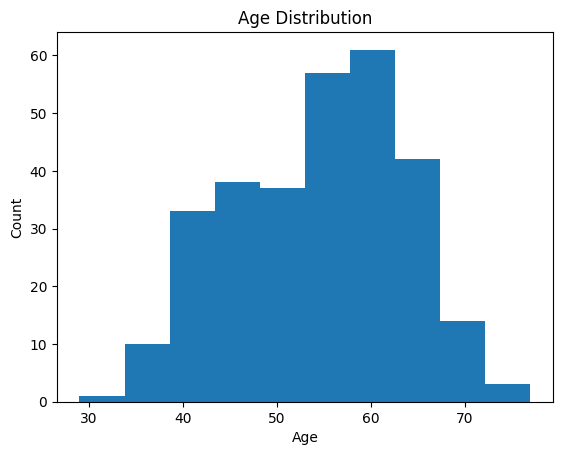

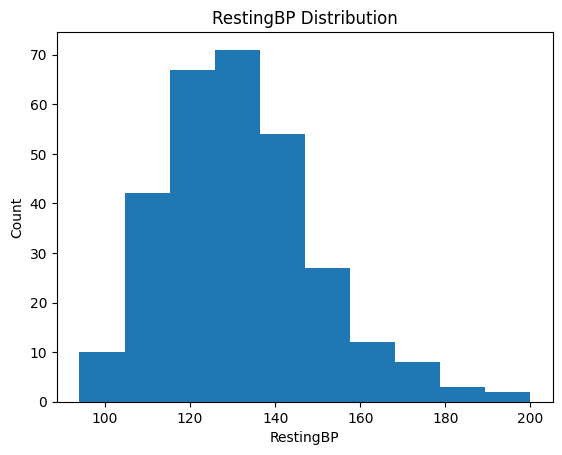

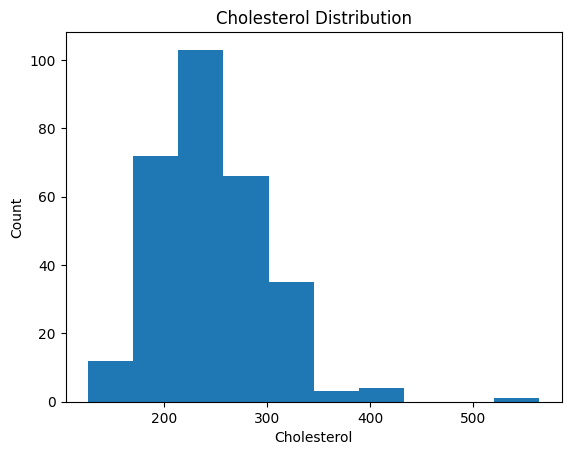

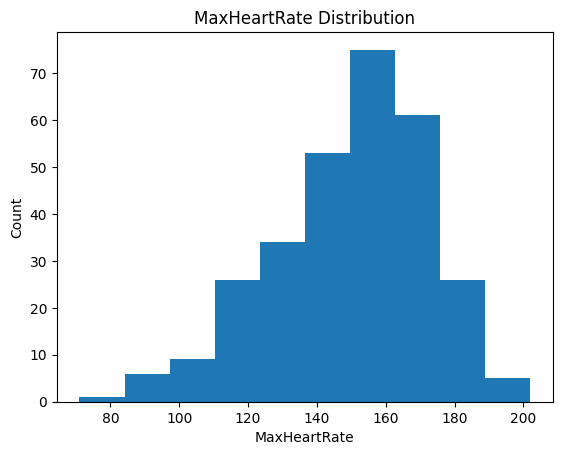

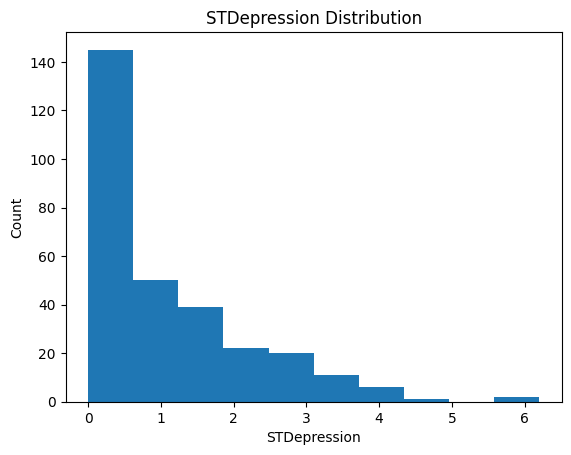

In [41]:
for column in numerical_data.columns:
    plt.figure()
    plt.hist(numerical_data[column])
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()


Categorical Data Visualization:

In [35]:
data[categorical_data.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
ChestPain,296.0,0.969595,1.036170,0.0,0.0,1.0,2.0,3.0
ExerciseAngina,296.0,0.327703,0.470171,0.0,0.0,0.0,1.0,1.0
FastingSugar,296.0,0.141892,0.349530,0.0,0.0,0.0,0.0,1.0
MajorVessels,296.0,0.706081,0.997334,0.0,0.0,0.0,1.0,4.0
RestingECG,296.0,0.530405,0.526344,0.0,0.0,1.0,1.0,2.0
STSegmentSlope,296.0,1.395270,0.618235,0.0,1.0,1.0,2.0,2.0
Sex,296.0,0.685811,0.464978,0.0,0.0,1.0,1.0,1.0
Target,296.0,0.543919,0.498911,0.0,0.0,1.0,1.0,1.0
Thalassemia,296.0,2.320946,0.612054,0.0,2.0,2.0,3.0,3.0


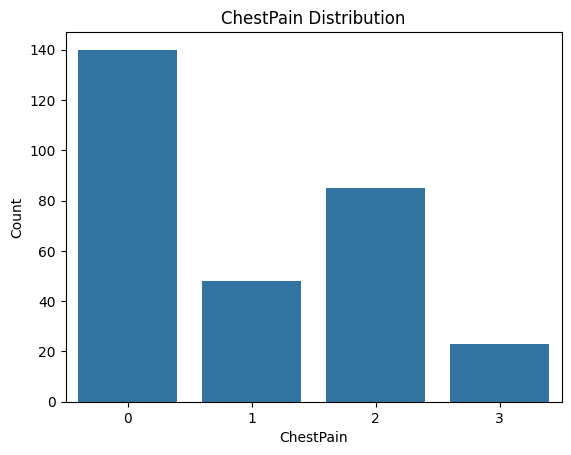

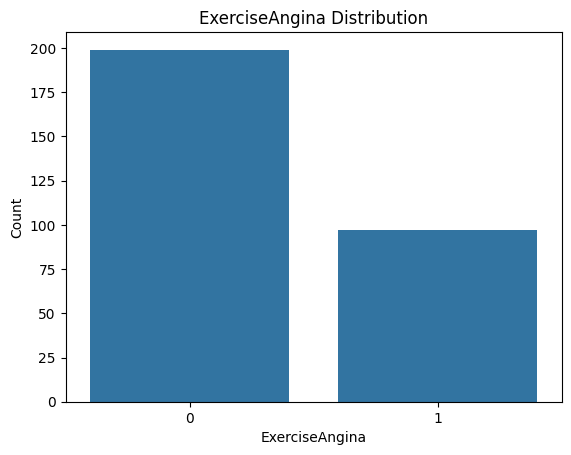

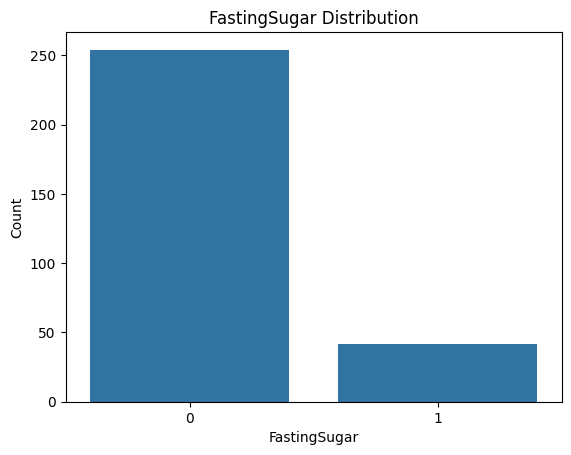

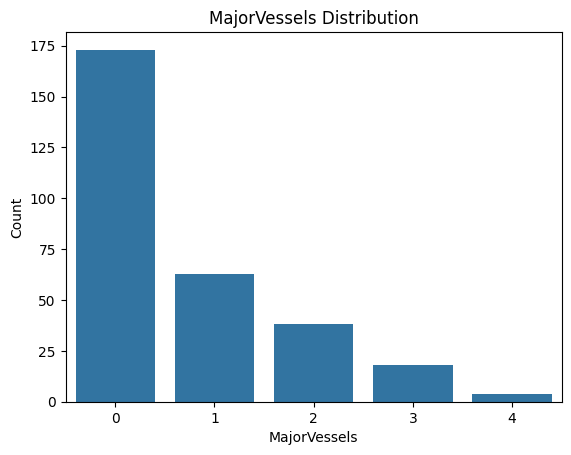

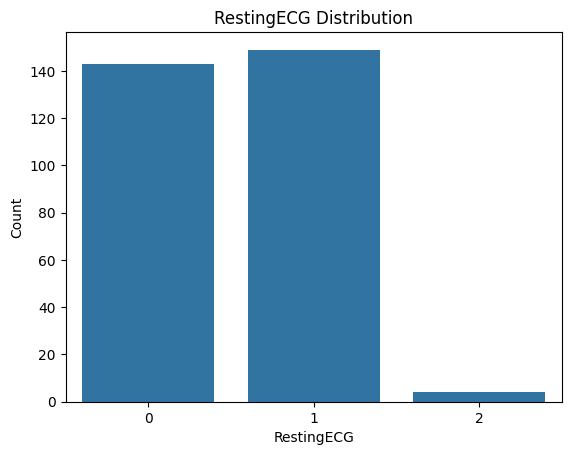

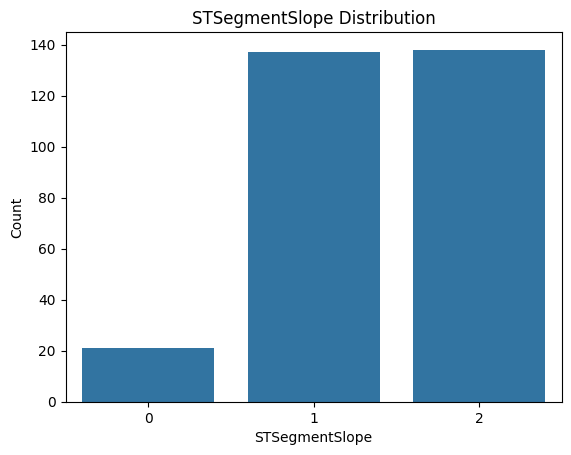

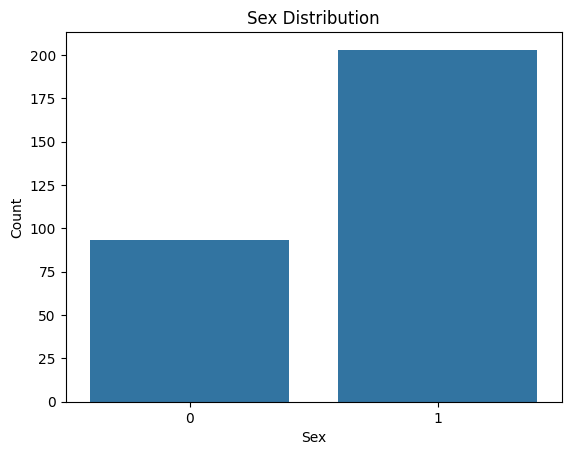

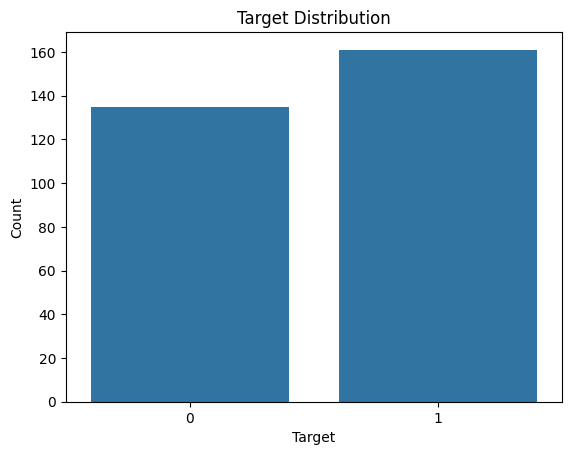

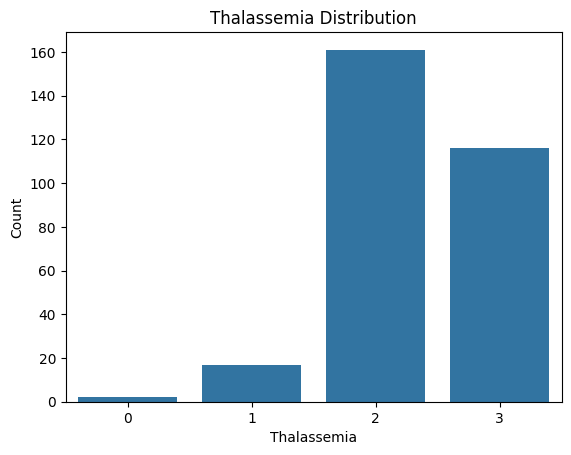

In [38]:
# Plot distribution graphs for categorical features
for column in categorical_data.columns:
    plt.figure()
    sns.countplot(data=data, x=column)
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()


Creating correlation heatmaps to graphycially see how features are related to eachother.

<Axes: >

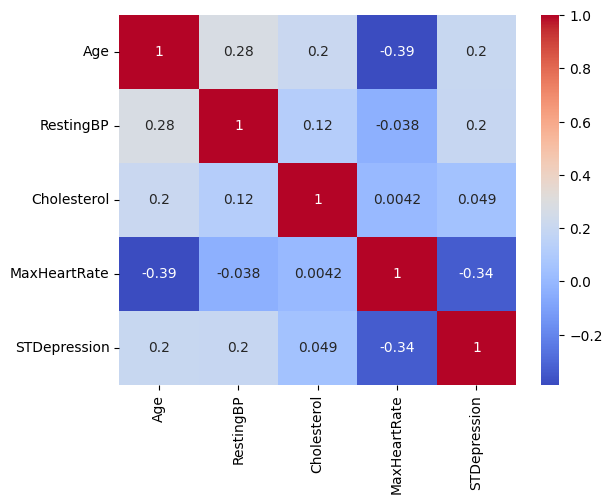

In [43]:
correlation_matrix = numerical_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


The heatmap above provides a visual representation of the correlation matrix for the numerical features in the dataset. The correlation matrix shows the relationships between different variables, with values ranging from -1 to 1. A value of 1 indicates a strong positive correlation, while a value of -1 indicates a strong negative correlation.

From the heatmap, we can observe that there is a positive correlation between age and resting blood pressure, as well as between age and cholesterol levels. On the other hand, there is a negative correlation between age and maximum heart rate achieved.

Overall, the heatmap provides valuable insights into the relationships between different numerical features in the dataset, allowing us to identify potential patterns and dependencies that can further inform our analysis.

# 2. Objectives


We will use 3 different models to predict our target.

1. Logistic Regression Model
: 
It is a powerful tool for binary classification tasks and can provide valuable insights and predictions in various domains. Predicting our target value with logistic regression model might give great results.

2. K-Nearest Neighbors Model: In the context of a binary classification task, KNN works by assigning a new data point to the class most common among its 'K' nearest neighbors. 'K' is a user defined constant, and an optimal value of 'K' is crucial for the best performance of the KNN algorithm. Also it can be useful model for classification projects.

3. Support Vector Machines: Support Vector Machines (SVM) is a powerful machine learning model, capable of performing binary classification and multi-class classification. For our dataset, which includes features like age, sex, chest pain type, and more, SVM can be particularly useful. It works by finding the hyperplane that best separates the classes in the feature space, maximizing the margin between the closest points of different classes. This makes SVM capable of handling complex, high-dimensional datasets. It's a suitable choice for our dataset, potentially providing high accuracy in predicting the presence of the target variable.

# 3. Classification Models


# Logistic Regression Model

In [71]:
cat_features = categorical_data
seed = 0
test_size = 0.25

features = data.columns[:-1]

X = data[features]
y = data['Target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state=seed)
# Create an instance of the LogisticRegression model
logreg = LogisticRegression(max_iter=1000000)

# Fit the model to the training data
logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_val)


# K-Nearest Neighbors Model


In [72]:
# Create an instance of the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)  

# Fit the model to your training data
knn.fit(X_train, y_train)

# Predict the target variable for new data
y_pred_KNN = knn.predict(X_val)



# Support Vector Machines(SVM) Model

In [73]:
# Create an SVM model
svm_model = SVC()

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_SVM = svm_model.predict(X_val)


# 4. Insights and key findings


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define the variables
y_pred_list = [y_pred_log, y_pred_KNN, y_pred_SVM]  

# Define the models
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Define the values
values = [[accuracy_score(y_val, y_pred), precision_score(y_val, y_pred), recall_score(y_val, y_pred), f1_score(y_val, y_pred)] for y_pred in y_pred_list]

# Create the table
table = pd.DataFrame(values, columns=metrics, index=models)

# Display the table
print(table)


                        Accuracy  Precision    Recall  F1-score
Logistic Regression     0.837838   0.815789  0.861111  0.837838
K-Nearest Neighbors     0.554054   0.534884  0.638889  0.582278
Support Vector Machine  0.635135   0.578947  0.916667  0.709677


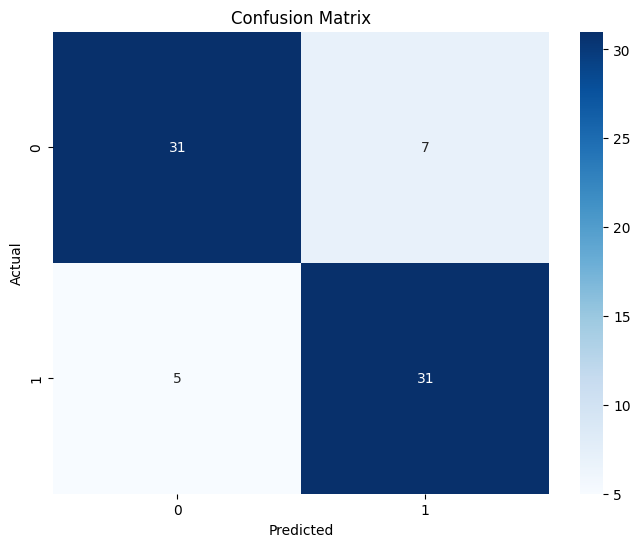

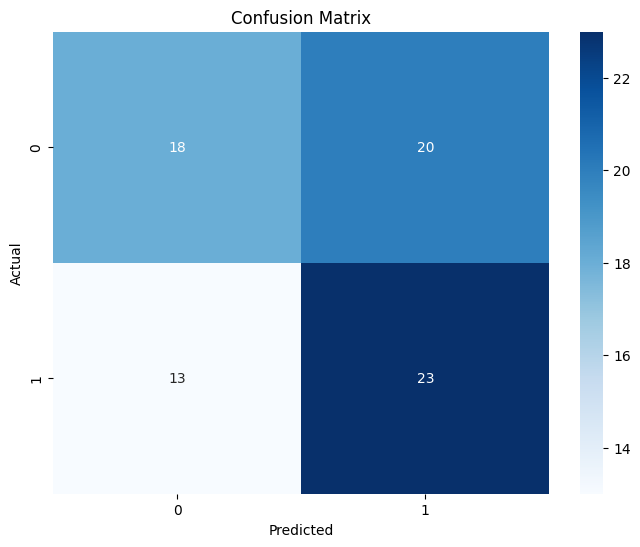

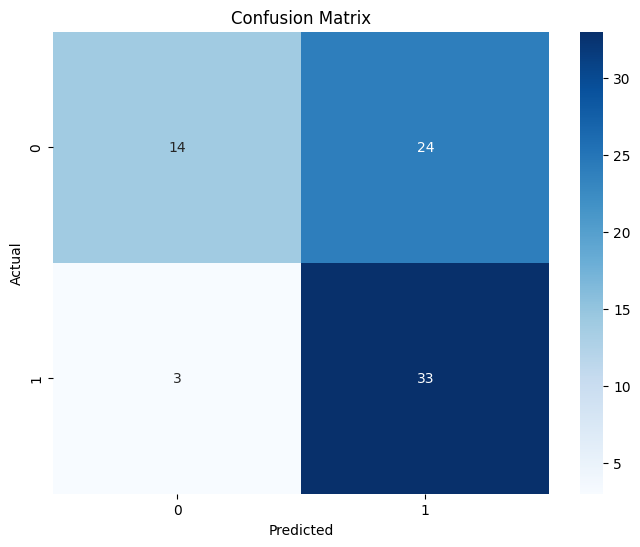

In [79]:
from sklearn.metrics import confusion_matrix

# Define a function to draw a confusion matrix
def draw_confusion_matrix(model, X, y):
    # Make predictions
    y_pred = model.predict(X)
    
    # Create a confusion matrix
    cm = confusion_matrix(y, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Draw confusion matrix for each model
models = [logreg, knn, svm_model]  # Replace with your models
for model in models:
    draw_confusion_matrix(model, X_val, y_val)


Based on the performance metrics of the three models, Logistic Regression appears to be the most effective for predicting the target variable in this dataset. It has the highest accuracy (83.78%), precision (81.58%), and F1-score (83.78%). The overall performance of Logistic Regression is superior.

The K-Nearest Neighbors model has the lowest performance across all metrics, with an accuracy of 55.40%, precision of 53.49%, recall of 63.89%, and F1-score of 58.23%. This suggests that this model may not be the best choice for this particular dataset or we need to change the value of k.

The Support Vector Machine model has a high recall (91.67%) but lower accuracy (63.51%), precision (57.89%), and F1-score (70.97%) compared to Logistic Regression. This indicates that while the SVM model is good at identifying positive cases, it is less accurate overall and has a higher rate of false positives.

In conclusion, for this particular dataset and target prediction, the Logistic Regression model provides the best performance and should be the preferred choice. 



# 5. Next Steps


The next steps in our analysis could involve creating more models using different algorithms to further evaluate the performance and accuracy of our predictions. This can help us gain a better understanding of which algorithm works best for our dataset and problem at hand. Additionally, we can consider increasing our dataset by collecting more relevant data, which can potentially improve the model's performance and generalization.

In terms of real-life applications, the trained model can be utilized in various scenarios. For instance, it can be integrated into a healthcare system to assist doctors in diagnosing heart disease. By inputting patient data, such as age, sex, blood pressure, cholesterol levels, and other relevant features, the model can provide a prediction on the likelihood of the patient having heart disease. This can aid in early detection and prompt treatment, potentially saving lives.

Overall, the next steps involve further model improvements, dataset expansion, and testing the model's predictive capabilities in real-life applications to improve healthcare outcomes and advance our understanding of heart disease.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
